# Week 12 
# Introduction to Neural Networks

Slides can be found [here](https://drive.google.com/file/d/1Ae5ancx-CW1eah51cNgKzfu87VDUTK_n/view?usp=sharing)

**Training large neural networks requires a lot of calculation.** Please turn on GPU computing from "Edit" -> "Notebook Setting" -> "Hardware Acceleration" before running the code below.

# Build a Classifier for Hand-Written Digits

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

In [ ]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.4.1


In [ ]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


Shape of the image: (28, 28)


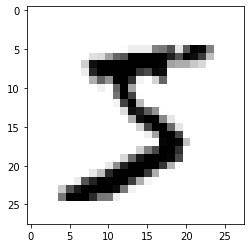

In [ ]:
# extract the first image in x_train
idx = 0
img = x_train[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
print("Shape of y_train:", y_train.shape)
y_train[idx]

Shape of y_train: (60000,)


5

In [ ]:
import tensorflow.keras as K # A common abbrevation of the kera package.
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])

In [ ]:
# For each example the model returns a vector of "logits", one for each class.
index = 123
predictions = model(x_train[index:(index+1)]).numpy()
print(predictions)

[[-0.221  0.518 -0.155  0.288  0.178 -0.396  0.288  0.061 -0.129 -0.511]]


In [ ]:
# The tf.nn.softmax function converts these logits to probabilities for each class
probs = tf.nn.softmax(predictions).numpy()
print(probs)

[[0.077 0.161 0.082 0.128 0.115 0.065 0.128 0.102 0.084 0.058]]


In [ ]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

1


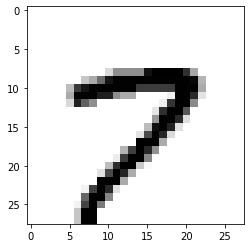

In [ ]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

The prediction accuracy is low, since no training has been performed yet. Let's introduce a function that measures the prediction error.

In [ ]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[index:(index+1)], predictions).numpy()

2.2816932

In [ ]:
# Set up the training environment
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4025 - accuracy: 0.8808
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0938 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0385 - accuracy: 0.9873


In [ ]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9767


[0.0805821493268013, 0.9767000079154968]

The image classifier is now trained to ~98% accuracy on this dataset. Let's create a test case ourselves. For example, we can use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

Upload the image to Colab environment by clicking the "Upload to Session Storage" button in the File tab on the left.

In [ ]:
# import pillow for image transformation
import PIL
img = PIL.Image.open("test_img.png")
img = img.convert('1') # convert image to black and white
print(img.size)

FileNotFoundError: ignored

In [ ]:
img

In [ ]:
# What values are contained in img by default?
img_processed = np.asarray(img).astype(float)
plt.imshow(img_processed, cmap=plt.cm.binary)

In [ ]:
# Switch black and white values
img_np = 1 - np.asarray(img).astype(float)
plt.imshow(img_np, cmap=plt.cm.binary)

In [ ]:
# Obtain predictions from the model
raw_prediction = model(img_np.reshape([-1, 28, 28]))
print(raw_prediction)

In [ ]:
# Convert the output into a numpy array
predictions = raw_prediction.numpy()
print(predictions)

In [ ]:
# Convert the raw outputs (logits) into probabilities
probs = tf.nn.softmax(predictions).numpy()
print(probs)

In [ ]:
class_prediction = np.argmax(probs)
print(class_prediction)

In [ ]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# y_test_pred = np.argmax(model(x_test).numpy())
y_test_pred = []
raw_predictions = model(x_test).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_test_pred.append(class_pred)
print(y_test_pred)

In [ ]:
mat = confusion_matrix(y_test, y_test_pred)
print(mat)

# Exercise: Are larger models better?
Modify the neural network model in one of the following ways:
1. Increate the number of neurons from 128 to 256.
2. Add another layer of 128 nodes.
Report the accuracy and the confusion matrix on the test set.

